# ACI Assignment 1: Problem Statement - 4 [ IMDB ]

#### Problem statement

IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 

We are extracting IMDb data which contains details about content as episodes and respective rating. We are trying to predict average rating.

### Assignment Group 102


 | Name | Student ID | 
 | :- | :- |  
 | Shiva Bansal | 2020FC04280 | 
 | Ashish Kumar Singh | 2020FC04285 | 
 | Hariom Yadav | 2020FC04503| 

# **1.	Import Libraries/Dataset**
* Download the dataset
* Import the required libraries


In [1]:
import urllib.request
import gzip
import shutil
import os


def dowload_imdb_dataset():
    print("Downloading the required IMDB Dataset from the repository !!!")
    
    if not os.path.exists("Dataset"):
        os.makedirs("Dataset")

    # URL to download -> https://datasets.imdbws.com/name.basics.tsv.gz
    filename_lists = ["title.basics.tsv.gz", 
                      "title.crew.tsv.gz", 
                      "title.ratings.tsv.gz",
                      "title.akas.tsv.gz",
                      "title.episode.tsv.gz",
                      "title.principals.tsv.gz",
                      "name.basics.tsv.gz"
                     ]
    length = len(filename_lists)
    i = 0
    for file_name in filename_lists:
        i += 1
        url = "https://datasets.imdbws.com/"+ file_name
        urllib.request.urlretrieve(url, "Dataset/"+ file_name)
        percent = round(i/length*100)
        print(f"{percent}% complete, downloading progress. Please wait !!!")
    print("\n Done! Downloading complete \n")


if __name__ == "__main__":
    dowload_imdb_dataset()

14% complete, downloading progress. Please wait !!!
29% complete, downloading progress. Please wait !!!
43% complete, downloading progress. Please wait !!!
57% complete, downloading progress. Please wait !!!
71% complete, downloading progress. Please wait !!!
86% complete, downloading progress. Please wait !!!
100% complete, downloading progress. Please wait !!!

 Done! Downloading complete 



In [197]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sc
from ipywidgets import widgets

# **Reading the DataSet and storing into to serate DataFrame**
### Data set details can be found at https://www.imdb.com/interfaces/

In [198]:
df_title_basic = pd.read_csv("Dataset/title.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_ratings = pd.read_csv("Dataset/title.ratings.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_akas = pd.read_csv("Dataset/title.akas.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_crew = pd.read_csv("Dataset/title.crew.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_episode = pd.read_csv("Dataset/title.episode.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_principals = pd.read_csv("Dataset/title.principals.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_name_basics = pd.read_csv("Dataset/name.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)

## Print at least 5 rows for sanity check to identify all the features present in the dataset

## i. title.basics

In [48]:
df_title_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## ii. title.ratings

In [6]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1803
1,tt0000002,6.0,232
2,tt0000003,6.5,1553
3,tt0000004,6.1,152
4,tt0000005,6.2,2376


#### Total Titles :- 8179764
#### Total titles rated rated:- 1181105

## iii. title.akas

In [149]:
df_title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


## iv. title.crew

## v. title.episode

In [9]:
df_title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0021166,tt15180956,1,3
2,tt0021612,tt15180956,2,2
3,tt0021664,tt15180956,2,4
4,tt0021701,tt15180956,2,1


## vi. title.principals

In [10]:
df_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


## vii. name.basics

In [11]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0054452,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0050976,tt0083922"


# 2. b Print the description and shape of the dataset

## i -> df_title_basic description and shape

In [12]:
df_title_basic.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,8179764,8179764,8179755,8179755,8179764,8179764,8179764,8179764,8179754
unique,8179764,12,3922707,3941211,9,149,96,849,2289
top,tt5362746,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,5992716,40424,40424,7930480,954798,8099194,5875070,876211


In [26]:
df_title_basic.shape

(8206370, 9)

## ii -> df_title_ratings description and shape

In [30]:
df_title_ratings.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,averageRating,numVotes
count,1182639.0,1182639.0
mean,6.9,973.1
std,1.4,16275.7
min,1.0,5.0
25%,6.2,11.0
50%,7.1,23.0
75%,7.9,91.0
max,10.0,2449517.0


In [31]:
df_title_ratings.shape

(1182639, 3)

## iii -> df_title_akas description and shape

In [33]:
df_title_akas.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,ordering
count,28849086.0
mean,4.0
std,3.4
min,1.0
25%,2.0
50%,3.0
75%,6.0
max,165.0


In [34]:
df_title_akas.shape

(28849086, 8)

## iv -> df_title_crew description and shape

In [35]:
df_title_crew.describe()

,tconst,directors,writers
count,8203690,8203690,8203690
unique,8203690,823882,1131693
top,tt15087626,\N,\N
freq,1,3469964,4023177


In [36]:
df_title_crew.shape

(8203690, 3)

## v -> df_title_episode description and shape

In [37]:
df_title_episode.describe()

,tconst,parentTconst,seasonNumber,episodeNumber
count,6014726,6014726,6014726,6014726
unique,6014726,161924,366,15682
top,tt8371190,tt0058796,1,\N
freq,1,14313,2999110,1218265


In [38]:
df_title_episode.shape

(6014726, 4)

## vi -> df_title_principals description and shape

In [40]:
df_title_principals.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,ordering
count,46437627.0
mean,4.6
std,2.8
min,1.0
25%,2.0
50%,4.0
75%,7.0
max,10.0


In [41]:
df_title_principals.shape

(46437627, 6)

## vii -> df_name_basics description and shape

In [42]:
df_name_basics.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,11173424,11173424,11173424,11173424,8779850,11173424
unique,11173424,8692389,505,443,20467,4616686
top,nm9822628,David Smith,\N,\N,actor,\N
freq,1,337,10640371,10980709,1995732,2099651


In [43]:
df_name_basics.shape

(11173424, 6)

In [45]:
df_name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050976,tt0050986"
...,...,...,...,...,...,...
11173419,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662"
11173420,nm9993716,Essias Loberg,\N,\N,NaN,\N
11173421,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11173422,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


# 2.C   Provide appropriate visualization to get an insight about the dataset.

<AxesSubplot:ylabel='Frequency'>

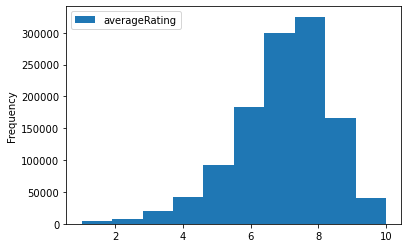

In [148]:
# Rating distribution
df_title_ratings[['averageRating','tconst']].plot.hist()

# 2.d Try exploring the data and see what insights can be drawn from the dataset.

df_title_akas

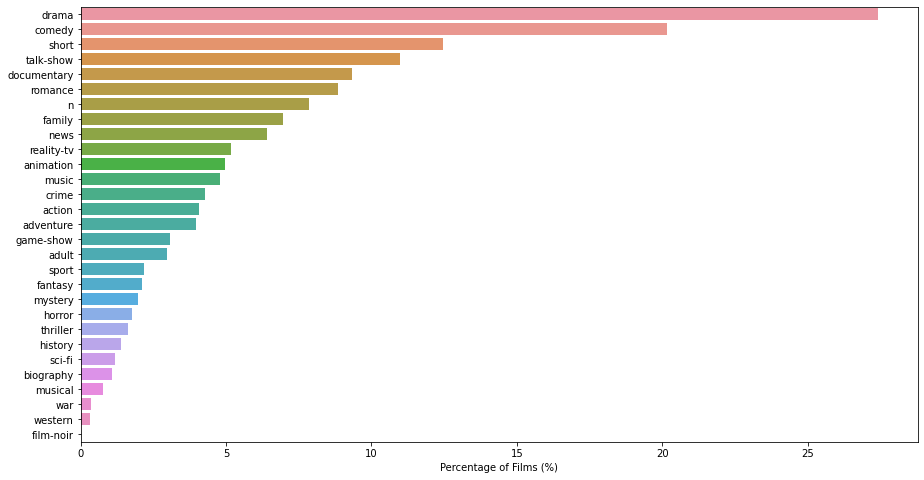

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df_title_basic.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

### 1. Analyze how title length affects the ratings.

<AxesSubplot:xlabel='bins_runtime'>

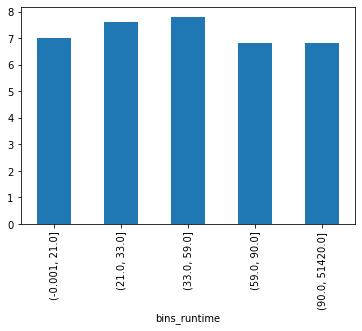

In [292]:
data_analysis_df = pd.merge(df_title_ratings, df_title_basic,on=['tconst'] )
data_analysis_df['runtimeMinutes'] = pd.to_numeric(data_analysis_df['runtimeMinutes'], errors='coerce')
data_analysis_df['bins_runtime'] = pd.qcut(data_analysis_df['runtimeMinutes'], q=5)
data_analysis_df[['bins_runtime', 'averageRating']].groupby('bins_runtime')['averageRating'].agg(pd.Series.mode).plot.bar(figsize=(10,5),
title= " Title Length on Ratings", ylabel='Average Rating')

### 2. -	Determine which language artifacts has higher rating

<AxesSubplot:title={'center':' Top 10 languages that gave best movies'}, xlabel='language', ylabel='Average Rating'>

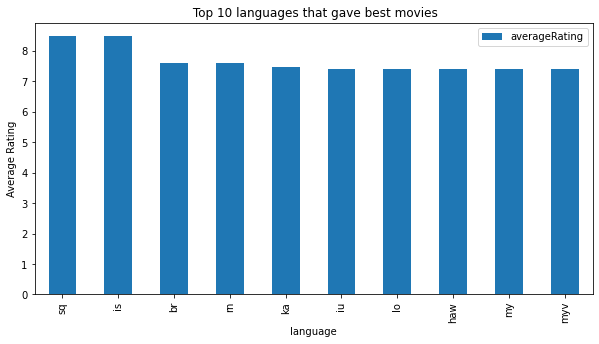

In [379]:
data_analysis_df = pd.merge(df_title_ratings, df_title_akas, left_on='tconst', right_on='titleId' )
data_analysis_df = data_analysis_df.groupby('language')['averageRating'].agg('mean')
pd.DataFrame(data_analysis_df).sort_values('averageRating', ascending=False).head(10).plot.bar(figsize=(10,5),
                                                                                              title= " Top 10 languages that gave best movies", ylabel='Average Rating')

### 3. 	Identify the best directors and writers with highest ratings

<AxesSubplot:title={'center':' Top 20 Directors that gave best movies'}, xlabel='primaryName', ylabel='Average Rating'>

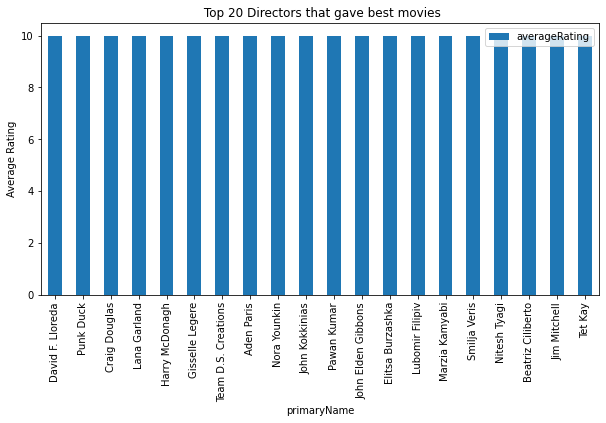

In [378]:
## Directors with best ratings
data_analysis_df = pd.merge(df_title_ratings, df_title_crew, on=['tconst'])
data_analysis_df['directors'] = data_analysis_df['directors'].str.split(",")
data_analysis_df = data_analysis_df.explode('directors')
data_analysis_df = data_analysis_df.groupby('directors')['averageRating'].agg('mean')
data_analysis_df = pd.DataFrame(data_analysis_df).sort_values('averageRating', ascending=False).head(20)
data_analysis_df = data_analysis_df.merge(df_name_basics,left_on='directors', right_on='nconst')[['primaryName','averageRating']]
data_analysis_df.set_index('primaryName').plot.bar(figsize=(10,5),
                                                  title= " Top 20 Directors that gave best movies", ylabel='Average Rating')

<AxesSubplot:title={'center':' Top 20 writers that gave best movies'}, xlabel='primaryName', ylabel='Average Rating'>

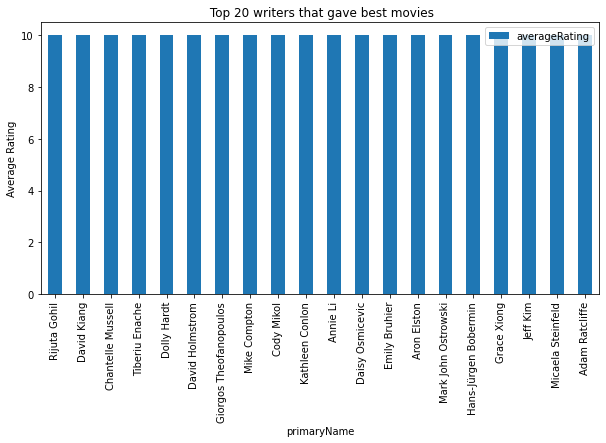

In [377]:
## Writers with best ratings
data_analysis_df = pd.merge(df_title_ratings, df_title_crew, on=['tconst'])
data_analysis_df['writers'] = data_analysis_df['writers'].str.split(",")
data_analysis_df = data_analysis_df.explode('writers')
data_analysis_df = data_analysis_df.groupby('writers')['averageRating'].agg('mean')
data_analysis_df = pd.DataFrame(data_analysis_df).sort_values('averageRating', ascending=False).head(20)
data_analysis_df=data_analysis_df.merge(df_name_basics,left_on='writers', right_on='nconst')[['primaryName','averageRating']]
data_analysis_df.set_index('primaryName').plot.bar(figsize=(10,5)
                                                  ,title= " Top 20 writers that gave best movies", ylabel='Average Rating')

#### Identify the region with the best ratings

<AxesSubplot:title={'center':' Top 10 regions with best rated movies'}, xlabel='region', ylabel='Average Rating'>

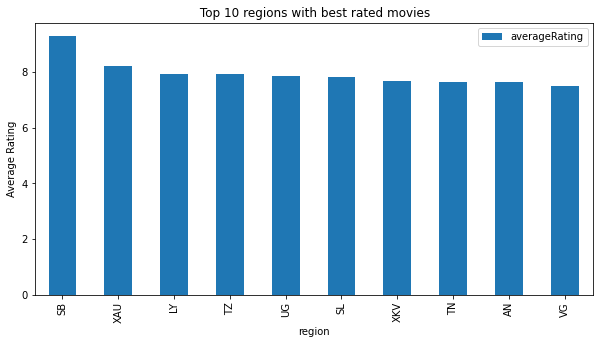

In [376]:
data_analysis_df = pd.merge(df_title_ratings, df_title_akas, left_on='tconst', right_on='titleId' )
data_analysis_df = data_analysis_df.groupby('region')['averageRating'].agg('mean')
pd.DataFrame(data_analysis_df).sort_values('averageRating', ascending=False).head(10).plot.bar(figsize=(10,5),
                                                                                              title= " Top 10 regions with best rated movies", ylabel='Average Rating')

### Analyze how the title length varied with years

<AxesSubplot:title={'center':'How length of title changeg over the years'}, xlabel='bins_startYear', ylabel='Running time'>

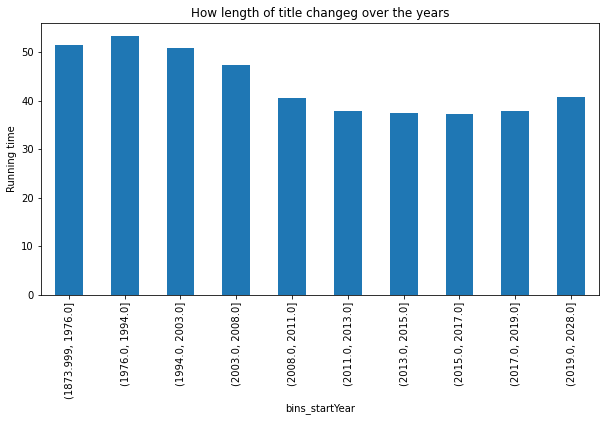

In [375]:
import warnings
warnings.filterwarnings('ignore')
data_analysis_df = df_title_basic[['startYear', 'runtimeMinutes']]
data_analysis_df['runtimeMinutes'] = pd.to_numeric(data_analysis_df['runtimeMinutes'], errors='coerce')
data_analysis_df['startYear'] = pd.to_numeric(data_analysis_df['startYear'], errors='coerce')
data_analysis_df['bins_startYear'] = pd.qcut(data_analysis_df['startYear'], q=10)
data_analysis_df.groupby('bins_startYear')['runtimeMinutes'].mean().plot.bar(figsize=(10,5), 
                                                                             title= "How length of title changeg over the years"
                                                                             , ylabel='Running time')

### -Identify the best crew that gave the best of releases

<AxesSubplot:title={'center':' Top 10 Crew that gave best movies'}, xlabel='crew', ylabel='Average Rating'>

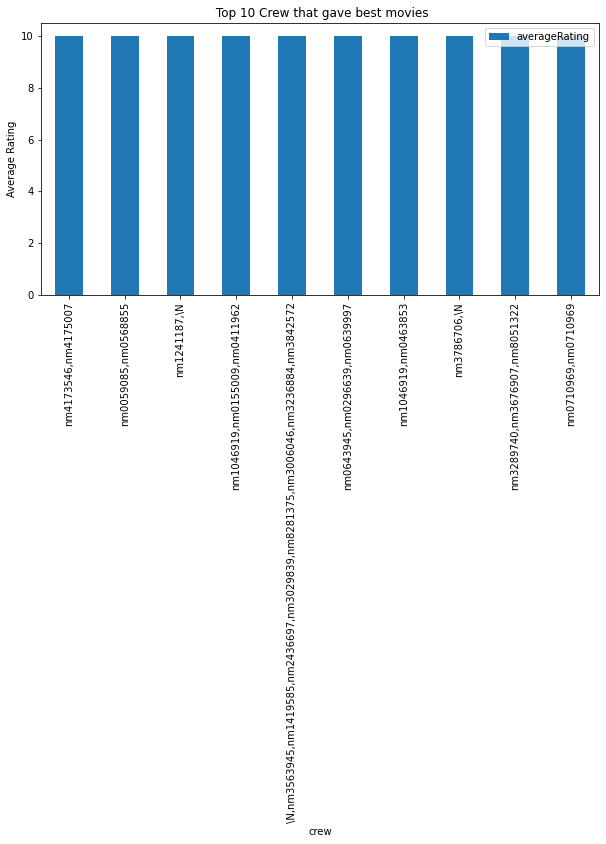

In [373]:
data_analysis_df = pd.merge(df_title_ratings, df_title_crew, on=['tconst'])
data_analysis_df["crew"] = data_analysis_df["directors"] + "," + data_analysis_df["writers"]
data_analysis_df = data_analysis_df.groupby("crew")['averageRating'].mean()
data_analysis_df = pd.DataFrame(data_analysis_df).sort_values('averageRating', ascending=False).head(10)
data_analysis_df.plot.bar(figsize=(10,5), title= " Top 10 Crew that gave best movies", ylabel='Average Rating')

### -	Which type of genre attracts more users

<AxesSubplot:title={'center':' Genre which attract more users'}, xlabel='primaryTitle', ylabel='Total votes/1000'>

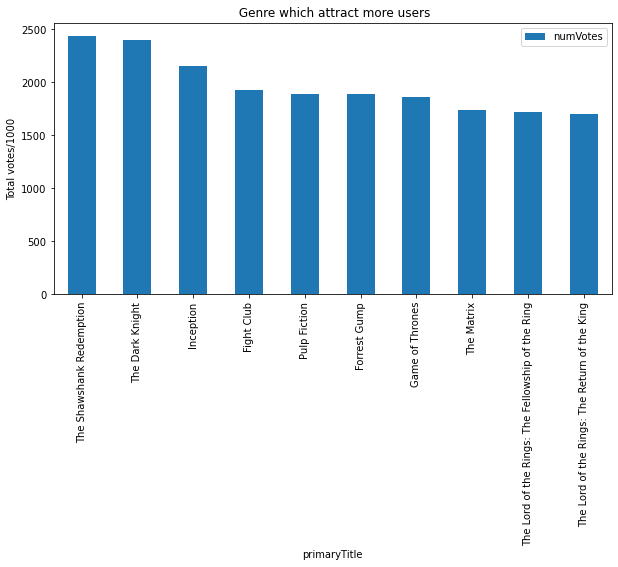

In [374]:
data_analysis_df = pd.merge(df_title_ratings, df_title_basic,on=['tconst'] )
data_analysis_df = data_analysis_df.groupby('primaryTitle')['numVotes'].sum()/1000
data_analysis_df = pd.DataFrame(data_analysis_df).sort_values('numVotes', ascending=False).head(10)
data_analysis_df.plot.bar(figsize=(10,5), title= " Genre which attract more users", ylabel='Total votes/1000')

## 2. -	Determine which language artifacts has higher rating

/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

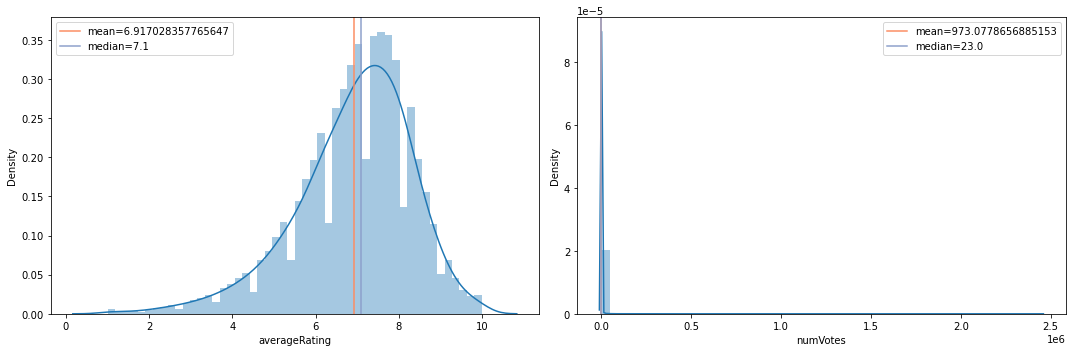

In [47]:
ratings = dict(mean=df_title_ratings.averageRating.mean(),
              median=df_title_ratings.averageRating.median())
votes = dict(mean=df_title_ratings.numVotes.mean(),
              median=df_title_ratings.numVotes.median())
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(df_title_ratings.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={ratings['mean']}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={ratings['median']}")
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(df_title_ratings.numVotes,kde_kws=dict(bw=0.2))
ax2.axvline(x=votes["mean"],c=sns.color_palette("Set2")[1],label=f"mean={votes['mean']}")
ax2.axvline(x=votes["median"],c=sns.color_palette("Set2")[2],label=f"median={votes['median']}")
plt.legend()
plt.tight_layout()
plt.show()

## 3. Identify the best directors and writers with highest ratings.

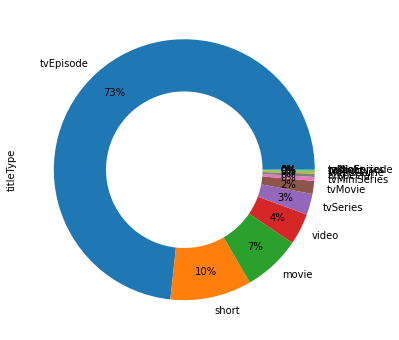

In [48]:
df_title_basic.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                             wedgeprops=dict(width=0.4))
plt.show()

## 4. Identify the region with the best ratings

<AxesSubplot:ylabel='category'>

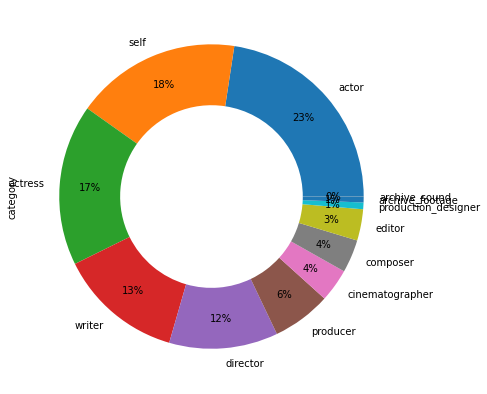

In [18]:
df_title_principals.category.value_counts().plot.pie(autopct="%.0f%%", pctdistance=0.8, figsize=(7,7),
                                                          wedgeprops=dict(width=0.4))

## 5. Analyze how the title length varied with years

## 6. Identify the best crew that gave the best of releases.

## 7. -	Which type of genre attracts more users. Analyze the genre that was most popular.

# Data Pre-processing and cleaning


### Feature considered for Modelling are
* Dependent variable : Average Rating
* Initial feature set : ['numVotes', 'titleType', 'isAdult', 'runtimeMinutes', 'parentRating', 'genre', 'language', 'region']
* Dropped features : ['genre', 'crew', language, region]
* Final features : ['numVotes', 'titleType', 'isAdult', 'runtimeMinutes', 'parentRating']

## Feature Engineering

#### joining title details with title ratings
* Total Titles :- 8179764
* Total titles rated rated:- 1181105
* considering only those title for which rating is available

In [231]:
ml_inferencing_input = pd.merge(df_title_ratings, df_title_basic,on=['tconst'] )

#### Extracting parent title rating from title.episode and then joined with title details and title ratings
* Intuition is sometimmes Main title has impact on episode ratings

In [232]:
df_temp = pd.merge(df_title_episode, ml_inferencing_input, left_on='parentTconst', right_on='tconst')[['tconst_x','averageRating']]
df_temp.rename(columns = {'averageRating':'parentRating', 'tconst_x': 'tconst'}, inplace = True)
ml_inferencing_input = pd.merge(ml_inferencing_input, df_temp, how='left', on='tconst')

In [233]:
ml_inferencing_input.head(5)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentRating
0,tt0000001,5.7,1803,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",NaN
1,tt0000002,6.0,232,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",NaN
2,tt0000003,6.5,1553,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",NaN
3,tt0000004,6.1,152,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",NaN
4,tt0000005,6.2,2376,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",NaN


#### Tries with number of region and languages from akas dataset performance had degraded. Removed from feature list

In [234]:
'''df_temp = df_title_akas.groupby('titleId').count()
df_temp = df_temp[['language', 'region']]
df_temp['tconst'] = df_temp.index
ml_inferencing_input = pd.merge(ml_inferencing_input, df_temp, how='left', on='tconst')'''

"df_temp = df_title_akas.groupby('titleId').count()\ndf_temp = df_temp[['language', 'region']]\ndf_temp['tconst'] = df_temp.index\nml_inferencing_input = pd.merge(ml_inferencing_input, df_temp, how='left', on='tconst')"

In [235]:
ml_inferencing_input

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentRating
0,tt0000001,5.7,1803,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",NaN
1,tt0000002,6.0,232,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",NaN
2,tt0000003,6.5,1553,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",NaN
3,tt0000004,6.1,152,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",NaN
4,tt0000005,6.2,2376,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1181100,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Animation,Comedy,Family",6.4
1181101,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Animation,Comedy,Family",6.4
1181102,tt9916720,5.4,123,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",NaN
1181103,tt9916766,6.9,18,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",7.6


In [236]:
# Counting number of genres
#ml_inferencing_input['no_of_genres'] = ml_inferencing_input['genres'].str.split(",").str.len()
## Its not having much impact on model output

In [237]:
ml_inferencing_input.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,averageRating,numVotes,parentRating
count,1181105.0,1181105.0,550156.0
mean,6.9,970.1,7.3
std,1.4,16239.7,1.1
min,1.0,5.0,1.0
25%,6.1,10.0,6.7
50%,7.1,23.0,7.4
75%,7.9,90.0,8.0
max,10.0,2440839.0,10.0


In [238]:
ml_inferencing_input.corr()

,averageRating,numVotes,parentRating
averageRating,1.000000,0.012148,0.472939
numVotes,0.012148,1.000000,0.108164
parentRating,0.472939,0.108164,1.000000


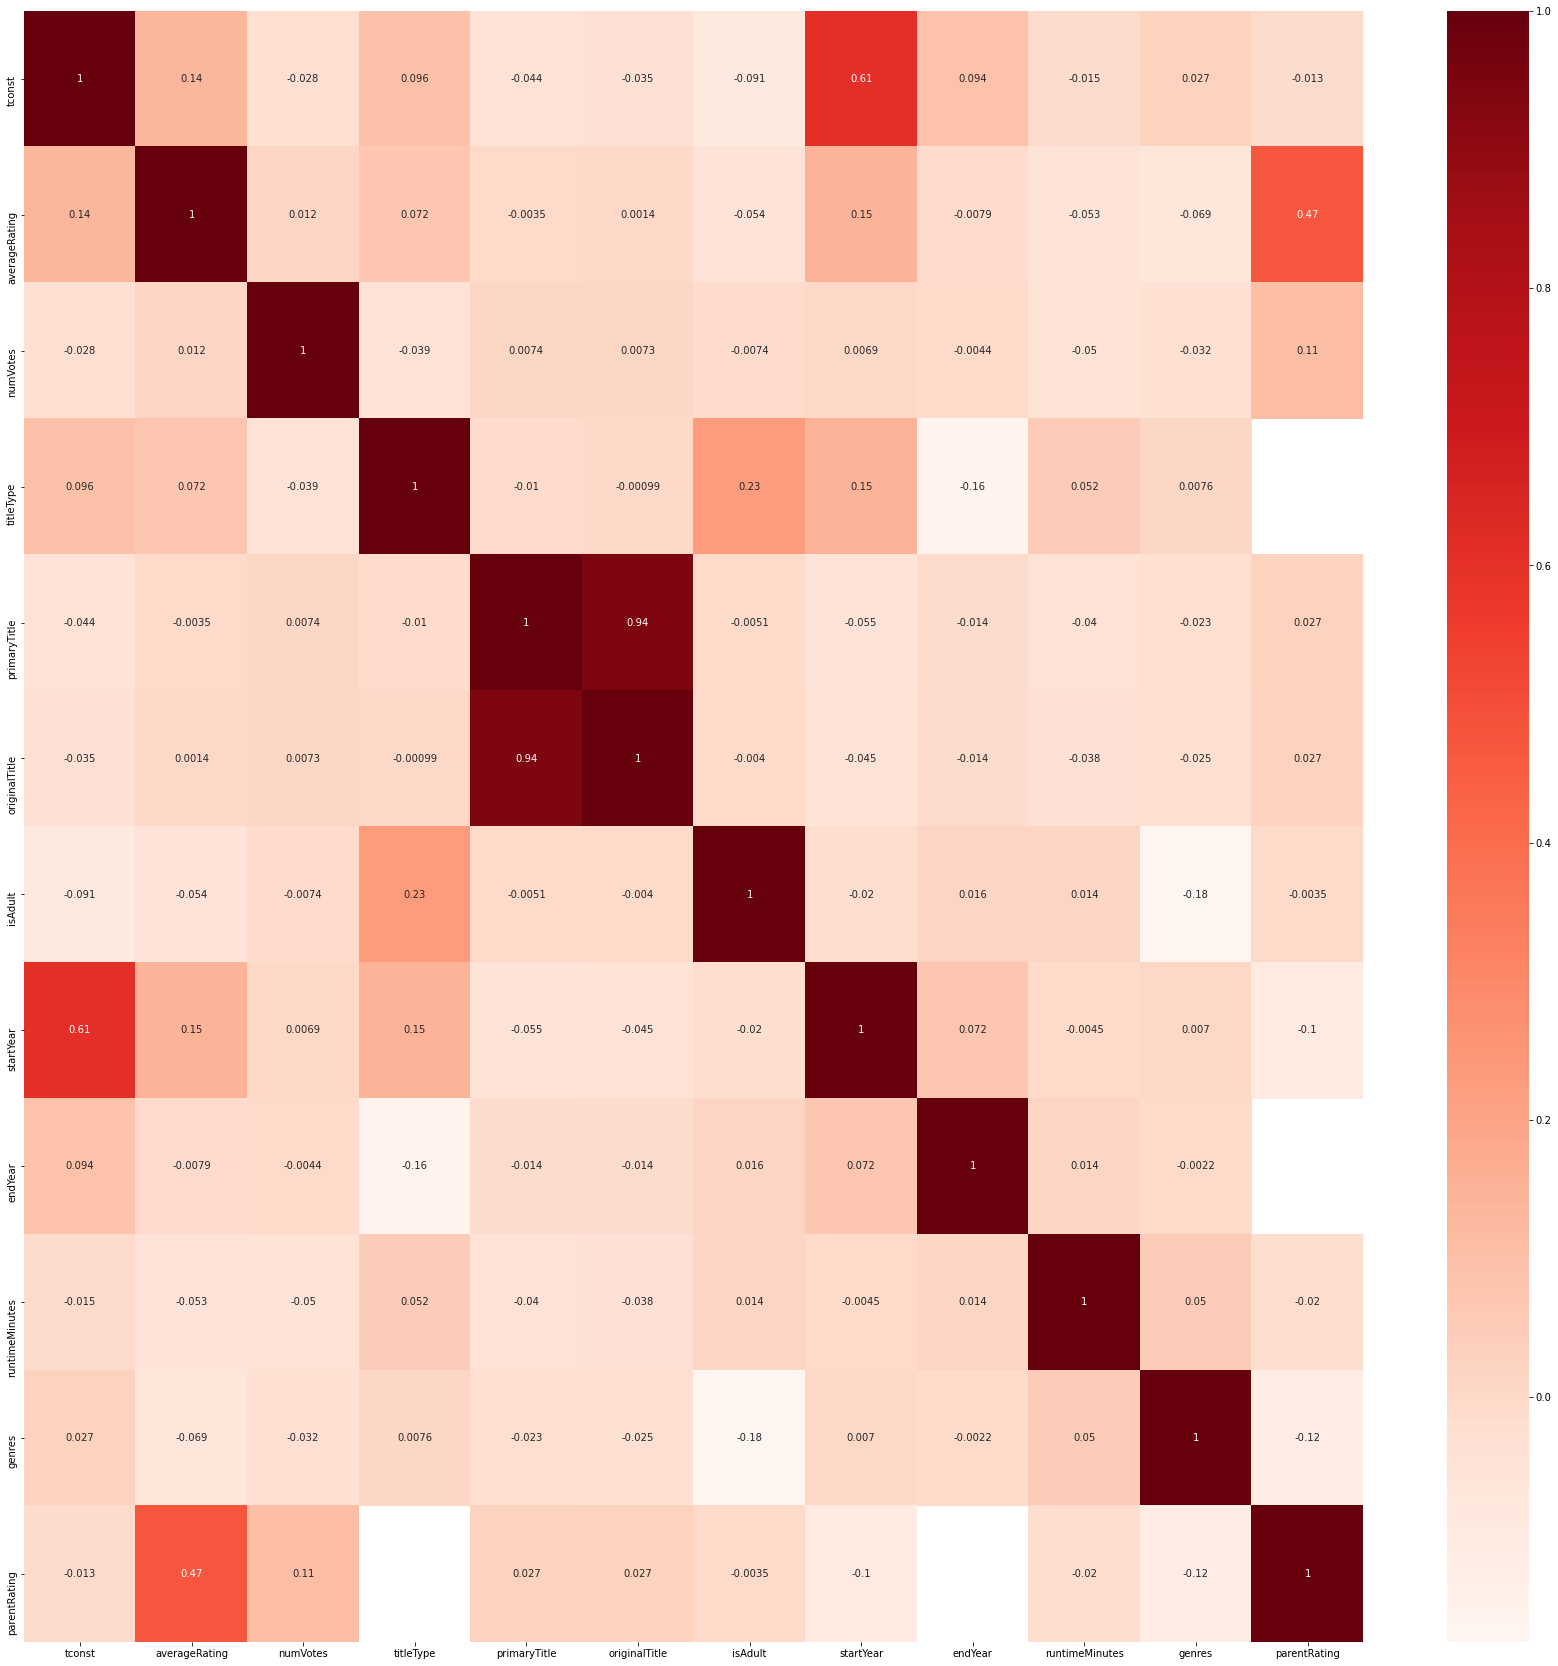

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))

for col_name in ml_inferencing_input.columns:
    if(ml_inferencing_input[col_name].dtype == 'object'):
        ml_inferencing_input[col_name]= ml_inferencing_input[col_name].astype('category')
        ml_inferencing_input[col_name] = ml_inferencing_input[col_name].cat.codes

#converting class variable to 0 and 1 to get correlation with other columns
corr = ml_inferencing_input.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Selecting features and dependent variable i.e. average rating for model training

In [240]:
ml_inferencing_input = ml_inferencing_input[['tconst', 'averageRating', 'numVotes', 'titleType', 'isAdult', 'runtimeMinutes',
       'parentRating']]

In [241]:
ml_inferencing_input = ml_inferencing_input.fillna({'parentRating':0, 'averageRating':0})

### Data Cleansing
* Missing values are filled with average values

In [242]:
df_temp = ml_inferencing_input['runtimeMinutes']
df_temp = pd.to_numeric(df_temp, errors='coerce')
ml_inferencing_input['runtimeMinutes'] =  df_temp.fillna(df_temp.mean())
ml_inferencing_input

,tconst,averageRating,numVotes,titleType,isAdult,runtimeMinutes,parentRating
0,0,5.7,1803,1,0,1,0.0
1,1,6.0,232,1,0,485,0.0
2,2,6.5,1553,1,0,393,0.0
3,3,6.1,152,1,0,37,0.0
4,4,6.2,2376,1,0,1,0.0
...,...,...,...,...,...,...,...
1181100,1181100,5.6,5,2,0,2,6.4
1181101,1181101,6.6,5,2,0,2,6.4
1181102,1181102,5.4,123,1,0,2,0.0
1181103,1181103,6.9,18,2,0,423,7.6


### One hot encoding for categorical feature title type

In [243]:
dummies = pd.get_dummies(ml_inferencing_input['titleType'], drop_first= True)
ml_inferencing_input = pd.concat([ml_inferencing_input, dummies], axis=1)
ml_inferencing_input = ml_inferencing_input.drop(['titleType'], axis=1)

### Train test split

In [244]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = ml_inferencing_input.drop(['tconst', 'averageRating'], axis=1).values
# Separating out the target
y = ml_inferencing_input['averageRating'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model Trainining

#### Linear regression

In [246]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction results

In [247]:
y_pred = regressor.predict(X_test)

In [248]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.7,6.738211
1,4.9,7.222837
2,8.6,7.730733
3,7.6,8.045328
4,7.2,7.496851


In [249]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.7,6.738211
1,4.9,7.222837
2,8.6,7.730733
3,7.6,8.045328
4,7.2,7.496851


### Model result validation
* MAE, MSE, RMSE measures are used for model validation

In [250]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9391536670084024
Mean Squared Error: 1.5582788217177503
Root Mean Squared Error: 1.2483103867699532


#### Random Forrest
#### Model Training

In [251]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=50, random_state=0)

#### Model prediction

In [252]:
y_pred = regressor.predict(X_test)

In [253]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.7,6.770649
1,4.9,7.284996
2,8.6,8.087929
3,7.6,7.585706
4,7.2,7.364318


### Model result validation
* MAE, MSE, RMSE measures are used for model validation

In [254]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9100138394070001
Mean Squared Error: 1.5129028805509506
Root Mean Squared Error: 1.2300011709551135


### GBT
### Model Training

In [255]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

### Model prediction

In [256]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.7,6.685633
1,4.9,7.242305
2,8.6,7.637273
3,7.6,8.149985
4,7.2,7.510131


### Model result validation
* MAE, MSE, RMSE measures are used for model validation

In [257]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.918239015663644
Mean Squared Error: 1.4938913045818634
Root Mean Squared Error: 1.222248462703825


#### Model comparison
* 5 k-fold data samples are created.
* These samples is used to compare model performance

In [258]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
eval_metrics_lr = []
X_split = []
Y_split = []
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_split.append((x[train_index], x[test_index]))
    Y_split.append((y[train_index], y[test_index]))

TRAIN: [ 236221  236222  236223 ... 1181102 1181103 1181104] TEST: [     0      1      2 ... 236218 236219 236220]
TRAIN: [      0       1       2 ... 1181102 1181103 1181104] TEST: [236221 236222 236223 ... 472439 472440 472441]
TRAIN: [      0       1       2 ... 1181102 1181103 1181104] TEST: [472442 472443 472444 ... 708660 708661 708662]
TRAIN: [      0       1       2 ... 1181102 1181103 1181104] TEST: [708663 708664 708665 ... 944881 944882 944883]
TRAIN: [     0      1      2 ... 944881 944882 944883] TEST: [ 944884  944885  944886 ... 1181102 1181103 1181104]


### LR, RF and GBT model training and validation 5 K-fold data samples

In [259]:
from sklearn import metrics
from datetime import datetime

eval_metrics_lr = []
lr_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
gbt_regressor = GradientBoostingRegressor(random_state=0)
for index,split in enumerate(X_split):
    #### Linear Regression Regressor #####
    lr_reg = lr_regressor.fit(split[0], Y_split[index][0])
    y_pred = lr_reg.predict(split[1])
    eval_metrics_lr.append(("test set" + str(index), "lr", metrics.mean_absolute_error(Y_split[index][1], y_pred)
                         ,metrics.mean_squared_error(Y_split[index][1], y_pred)
                         , np.sqrt(metrics.mean_squared_error(Y_split[index][1], y_pred))))
    
    print("test set" + str(index) + " --- lr model --- " + datetime.now().strftime("%Y%m%d %H:%M:%S"))
    
    #### Random Forrest Regressor ####
    rf_reg = rf_regressor.fit(split[0], Y_split[index][0])
    y_pred = rf_reg.predict(split[1])
    eval_metrics_lr.append(("test set" + str(index), "rf", metrics.mean_absolute_error(Y_split[index][1], y_pred)
                         ,metrics.mean_squared_error(Y_split[index][1], y_pred)
                         , np.sqrt(metrics.mean_squared_error(Y_split[index][1], y_pred))))
          
    print("test set" + str(index) + " --- rf model --- " + datetime.now().strftime("%Y%m%d %H:%M:%S"))
    
    #### GBT Regressor ####
    gbt_reg = gbt_regressor.fit(split[0], Y_split[index][0])
    y_pred = gbt_reg.predict(split[1])
    eval_metrics_lr.append(("test set" + str(index), "gbt", metrics.mean_absolute_error(Y_split[index][1], y_pred)
                         ,metrics.mean_squared_error(Y_split[index][1], y_pred)
                         , np.sqrt(metrics.mean_squared_error(Y_split[index][1], y_pred))))
    print("test set" + str(index) + " --- gbt model --- " + datetime.now().strftime("%Y%m%d %H:%M:%S"))

test set0 --- lr model --- 20210827 12:31:58
test set0 --- rf model --- 20210827 12:35:32
test set0 --- gbt model --- 20210827 12:38:40
test set1 --- lr model --- 20210827 12:38:41
test set1 --- rf model --- 20210827 12:43:17
test set1 --- gbt model --- 20210827 12:46:26
test set2 --- lr model --- 20210827 12:46:27
test set2 --- rf model --- 20210827 12:50:28
test set2 --- gbt model --- 20210827 12:53:34
test set3 --- lr model --- 20210827 12:53:35
test set3 --- rf model --- 20210827 12:57:39
test set3 --- gbt model --- 20210827 13:00:45
test set4 --- lr model --- 20210827 13:00:46
test set4 --- rf model --- 20210827 13:04:40
test set4 --- gbt model --- 20210827 13:07:58


### Model result visualizations

In [260]:
df = pd.DataFrame(eval_metrics_lr,columns= ["dataset", "model", "MAE", "MSE", 
              "RMSE"]).set_index("model", "dataset")
df

,dataset,MAE,MSE,RMSE
model,,,,
lr,test set0,0.971938,1.593793,1.262455
rf,test set0,1.062017,1.868662,1.366990
gbt,test set0,0.962792,1.554782,1.246909
lr,test set1,0.801327,1.219007,1.104087
rf,test set1,0.857324,1.365659,1.168614
gbt,test set1,0.789561,1.182913,1.087618
lr,test set2,0.990699,1.710463,1.307847
rf,test set2,1.000927,1.761737,1.327304
gbt,test set2,0.970483,1.645041,1.282591


In [261]:
df = df.reset_index()


<AxesSubplot:xlabel='dataset,metric'>

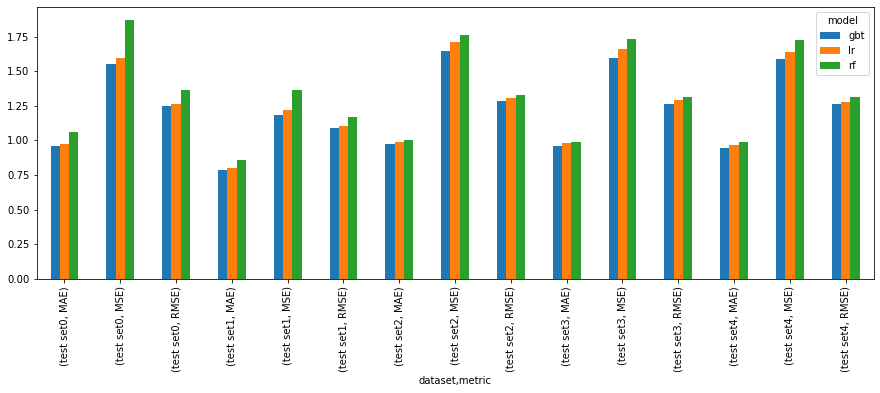

In [262]:
MAE_df = df.pivot(index='dataset', columns='model', values='MAE')
MAE_df["metric"] = "MAE"
MSE_df = df.pivot(index='dataset', columns='model', values='MSE')
MSE_df["metric"] = "MSE"
RMSE_df = df.pivot(index='dataset', columns='model', values='RMSE')
RMSE_df["metric"] = "RMSE"

valid_df = pd.concat([MAE_df, MSE_df, RMSE_df]).reset_index()
valid_df.sort_values(['dataset']).set_index(['dataset','metric']).plot.bar(figsize=(15,5))

## Conclusion

* GBT is outperforming Linear regression and Random Forrest.
* Model performance in descending order GBT > Linear Regression > Random Forrest